<a href="https://colab.research.google.com/github/lechemrc/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Rob_LeCheminant_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

#### Importing and viewing the data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [301]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [302]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2019-08-19 03:26:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data.3’

crx.data.3          100%[===================>]  31.46K  --.-KB/s    in 0.03s   

2019-08-19 03:26:03 (993 KB/s) - ‘crx.data.3’ saved [32218/32218]



In [303]:
# setting column names to the a-numbered columns in the data set
column_dict = {0:'a1', 1:'a2', 2:'a3', 3:'a4', 4:'a5', 5:'a6', 6:'a7', 7:'a8', 
           8:'a9', 9:'a10', 10:'a11', 11:'a12', 12:'a13', 13:'a14', 14:'a15', 
           15:'a16'}

#importing data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, na_values='?')
df = df.rename(columns=column_dict)

#viewing data
print(df.shape)
df.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


### checking and cleaning the data

In [304]:
#checking for null values ... I've found they're denoted by '?'
df.isna().sum() 

a1     12
a2     12
a3      0
a4      6
a5      6
a6      9
a7      9
a8      0
a9      0
a10     0
a11     0
a12     0
a13     0
a14    13
a15     0
a16     0
dtype: int64

In [305]:
# checking against the names file's percents
df['a16'].value_counts(normalize=True) 

-    0.555072
+    0.444928
Name: a16, dtype: float64

In [306]:
pos = df[df['a16'] == '+']
neg = df[df['a16'] == '-']

print(pos.head())
neg.head()

  a1     a2     a3 a4 a5 a6 a7    a8 a9 a10  a11 a12 a13    a14  a15 a16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   +


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,980.0,0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,400.0,0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,160.0,2,-


### Filling NaN values with the mode in respective + and - sets

I am doing this so that the mode doesn't become a number that may be associated with positive approvals in a negative row and visa versa

In [307]:
# creating a copy of the previous dfs to avoid copy error
approved = pos.copy()
denied = neg.copy()

# looping through each column
for feat in pos.columns:
  approved[feat].fillna(approved[feat].mode()[0], inplace=True)
  denied[feat].fillna(denied[feat].mode()[0], inplace=True)
  
print(approved.head())
denied.head()

  a1     a2     a3 a4 a5 a6 a7    a8 a9 a10  a11 a12 a13    a14  a15 a16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   +


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,0.0,0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,980.0,0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,400.0,0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,160.0,2,-


In [0]:
# continuous are: a2, a3, a8, a14, a15
continuous = ['a2', 'a3', 'a8', 'a14', 'a15']
# categorical are: a1, a4, a5, a6, a7, a9, a10, a12, a13, a16
categorical = ['a1', 'a4', 'a5', 'a6', 'a7', 'a9', 'a10', 'a12', 'a13', 'a16']

The datasets should be clean now and I will begin testing the different sets to find potential relationships 

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

#### Finding common values and means in each column to see if there might be some correlation

In [309]:
# finding the most common value in each column
for feat in approved.columns:
  print(feat)
  print(approved[feat].mode().values)
  print(denied[feat].mode().values)
#   if approved[feat].mode().values != denied[feat].mode().values:
#         print('examine this column')
  print('-------------\n\n')
  
# the idea in doing this is to see if the approved and denied values 
# differ at all in the mode. This may point me in the direction as to why 
# certain cases get approved or denied 

a1
['b']
['b']
-------------


a2
[20.42]
[23.58]
-------------


a3
[0. 3.]
[1.25]
-------------


a4
['u']
['u']
-------------


a5
['g']
['g']
-------------


a6
['c']
['c']
-------------


a7
['v']
['v']
-------------


a8
[0.]
[0.]
-------------


a9
['t']
['f']
-------------


a10
['t']
['f']
-------------


a11
[0]
[0]
-------------


a12
['f']
['f']
-------------


a13
['g']
['g']
-------------


a14
[0.]
[0.]
-------------


a15
[0]
[0]
-------------


a16
['+']
['-']
-------------




a2, a3, a9, a10 are the ones that differ in the mode, so I will look into these ones first. 

#### Feature 'a2'

In [310]:
app_a2_bins = pd.cut(approved['a2'], bins = 5)
approved_a2 = pd.crosstab(app_a2_bins, approved['a16'])
approved_a2

a16,+
a2,
"(13.687, 26.35]",117
"(26.35, 38.95]",93
"(38.95, 51.55]",64
"(51.55, 64.15]",26
"(64.15, 76.75]",7


In [311]:
den_a2_bins = pd.cut(denied['a2'], bins = 5)
denied_a2 = pd.crosstab(den_a2_bins, denied['a16'])
denied_a2

a16,-
a2,
"(15.105, 28.186]",210
"(28.186, 41.202]",126
"(41.202, 54.218]",34
"(54.218, 67.234]",9
"(67.234, 80.25]",4


Comparing those two sets of numbers, I'm not convinced that the feature 'a2' is statistically significant, but we'll try visualizing things and doing a t-test and chi squared test, and creating confidence intervals to see if that gives us any insight. 

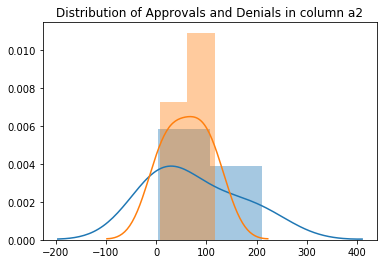

In [312]:
sns.distplot(denied_a2)
sns.distplot(approved_a2)
plt.title('Distribution of Approvals and Denials in column a2');

This graph is showing me that it's a narrower margin that gets approved than the denials. 

In [0]:
def confidence_interval_kde(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence.
  
  *** Displays Seaborn KDE plot as well with confidence intervals and mean ***
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  
  sns.kdeplot(data)
  plt.axvline(mean, color='k')
  plt.axvline(mean - interval, color='r')
  plt.axvline(mean + interval, color='r')
  plt.show()
  
  return mean, mean - interval, mean + interval

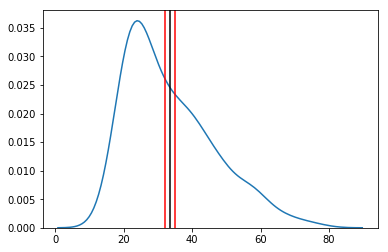

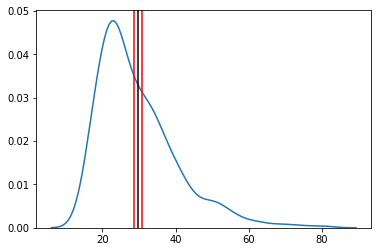

(29.6456135770235, 28.558430206711282, 30.732796947335718)

In [314]:
# using the function above to create confidence intervals and produce a KDE plot
# showing the distribution with the intervals and the mean of the data. 

confidence_interval_kde(approved['a2'])
confidence_interval_kde(denied['a2'])

We can see that the confidence interval is narrower with the denials and that it skews right a bit. The mean for approvals is also a higher value. 

#### Looping through for t-tests and p-values

In [315]:
# looping through each column 

n = 1
for feat in ['a2', 'a3', 'a8', 'a14', 'a15']:

  # printing out the t-stats
  tstat, pvalue = ttest_ind(approved[feat], denied[feat])
  print(approved.columns.values[n])
  print('T-Stat: ' + str(tstat))
  print('P Value: ' + str(pvalue))
  print('Confidence: ' + str(100 - pvalue) + '%')
  n += 1
  
  # testing if the p-value is within the extremes
  if (pvalue <= 0.05):
    print('REJECT null hypothesis')
  else: 
    print('FAIL TO REJECT null hypothesis')
  print('\n\n-----------------------\n')
  
  # I'm really not sure if this is getting me what I want to see or if this is 
  # actually getting me the right values... I'm going to dig further

a2
T-Stat: 4.431342274884706
P Value: 1.0894771975697794e-05
Confidence: 99.99998910522802%
REJECT null hypothesis


-----------------------

a3
T-Stat: 5.52998337614816
P Value: 4.551680702308068e-08
Confidence: 99.99999995448319%
REJECT null hypothesis


-----------------------

a4
T-Stat: 8.935819983773698
P Value: 3.6710537401601785e-18
Confidence: 100.0%
REJECT null hypothesis


-----------------------

a5
T-Stat: -2.6254915751389047
P Value: 0.008844680277712815
Confidence: 99.99115531972228%
REJECT null hypothesis


-----------------------

a6
T-Stat: 4.680216020964486
P Value: 3.4520256956287944e-06
Confidence: 99.9999965479743%
REJECT null hypothesis


-----------------------



#### Chi squared test for feature 'a2'

In [316]:
df['a2'].describe()

count    678.000000
mean      31.568171
std       11.957862
min       13.750000
25%       22.602500
50%       28.460000
75%       38.230000
max       80.250000
Name: a2, dtype: float64

In [317]:
# Creating distinct bins for a crosstab
cut_points = [0, 9, 19, 29, 39, 49, 59, 69]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']
df['a2'] = pd.cut(df['a2'], cut_points, labels=label_names)
df['a2'].value_counts()       

20-29    290
30-39    166
40-49     96
10-19     63
50-59     42
60+       14
0-9        0
Name: a2, dtype: int64

In [318]:
# sorting and displaying crosstab
df = df.sort_values(by='a2', ascending=True)
contingency_table = pd.crosstab(df['a16'], df['a2'], margins=True)
contingency_table

a2,10-19,20-29,30-39,40-49,50-59,60+,All
a16,,,,,,,
+,18,126,65,58,24,11,302
-,45,164,101,38,18,3,369
All,63,290,166,96,42,14,671


In [319]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values
print(row_sums)
print(col_sums)

[302 369]
[ 63 290 166  96  42  14]


In [320]:
total = contingency_table.loc['All', 'All']
total

671

In [321]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[ 28.35469449 130.52160954  74.7123696   43.2071535   18.90312966
    6.30104322]
 [ 34.64530551 159.47839046  91.2876304   52.7928465   23.09687034
    7.69895678]]


In [322]:
observed =  pd.crosstab(df['a16'], df['a2']).values
print(observed.shape)
observed

(2, 6)


array([[ 18, 126,  65,  58,  24,  11],
       [ 45, 164, 101,  38,  18,   3]])

In [323]:
chi_square, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_square, p_value, dof, expected)

27.537748321598226 4.4809455846405305e-05 5 [[ 28.35469449 130.52160954  74.7123696   43.2071535   18.90312966
    6.30104322]
 [ 34.64530551 159.47839046  91.2876304   52.7928465   23.09687034
    7.69895678]]


The p-value is pretty small, so it's fairly safe to reject the null hypothesis

#### Feature 'a3' -- chi squared

In [324]:
df['a3'].describe()

count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: a3, dtype: float64

In [325]:
# Creating distinct bins for a crosstab
cut_points = [0, 6, 11, 16, 21, 26]
label_names = ['0-5', '6-10', '11-15', '16-20', '21+']
df['a3'] = pd.cut(df['a3'], cut_points, labels=label_names)
df['a3'].value_counts()   

0-5      469
6-10     113
11-15     69
16-20     12
21+        6
Name: a3, dtype: int64

In [326]:
# sorting and displaying crosstab
df = df.sort_values(by='a3', ascending=True)
contingency_table = pd.crosstab(df['a16'], df['a3'], margins=True)
contingency_table

a3,0-5,6-10,11-15,16-20,21+,All
a16,,,,,,
+,177,68,39,8,5,297
-,292,45,30,4,1,372
All,469,113,69,12,6,669


In [327]:
row_sums = contingency_table.iloc[0:2, 5].values
col_sums = contingency_table.iloc[2, 0:5].values
print(row_sums)
print(col_sums)

[297 372]
[469 113  69  12   6]


In [328]:
total = contingency_table.loc['All', 'All']
total

669

In [329]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 5)
[[208.21076233  50.16591928  30.632287     5.32735426   2.66367713]
 [260.78923767  62.83408072  38.367713     6.67264574   3.33632287]]


In [330]:
observed =  pd.crosstab(df['a16'], df['a2']).values
print(observed.shape)
observed

(2, 6)


array([[ 18, 126,  65,  58,  24,  11],
       [ 45, 164, 101,  38,  18,   3]])

In [331]:
chi_square, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_square, p_value, dof, expected)

27.537748321598226 4.4809455846405305e-05 5 [[ 28.35469449 130.52160954  74.7123696   43.2071535   18.90312966
    6.30104322]
 [ 34.64530551 159.47839046  91.2876304   52.7928465   23.09687034
    7.69895678]]


Again, there is a very small p-value and small chi squared number... it's safe to reject the null hypothesis. 

#### Chi squared on feature 'a9'

In [333]:
observed =  pd.crosstab(df['a16'], df['a9']).values
print(observed.shape)
observed

(2, 2)


array([[ 23, 284],
       [306,  77]])

In [334]:
df = df.sort_values(by='a9', ascending=True)
contingency_table = pd.crosstab(df['a16'], df['a9'], margins=True)
contingency_table

a9,f,t,All
a16,,,
+,23,284,307
-,306,77,383
All,329,361,690


In [335]:
row_sums = contingency_table.iloc[0:2, 2].values
col_sums = contingency_table.iloc[2, 0:2].values

print(row_sums)
print(col_sums)

[307 383]
[329 361]


In [336]:
total = contingency_table.loc['All', 'All']
total

690

In [337]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


In [338]:
chi_square, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_square, p_value, dof, expected)

355.2038167412799 3.1185900878457007e-79 1 [[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


This chi squared test verges a bit higher and we can likely reject the null hypothesis, which is corroborated by the p-value 

#### Chi squared on feature 'a10'

In [339]:
observed =  pd.crosstab(df['a16'], df['a10']).values
print(observed.shape)
observed

(2, 2)


array([[ 98, 209],
       [297,  86]])

In [340]:
df = df.sort_values(by='a10', ascending=True)
contingency_table = pd.crosstab(df['a16'], df['a10'], margins=True)
contingency_table

a10,f,t,All
a16,,,
+,98,209,307
-,297,86,383
All,395,295,690


In [341]:
row_sums = contingency_table.iloc[0:2, 2].values
col_sums = contingency_table.iloc[2, 0:2].values

print(row_sums)
print(col_sums)

[307 383]
[395 295]


In [342]:
total = contingency_table.loc['All', 'All']
total

690

In [343]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[175.74637681 131.25362319]
 [219.25362319 163.74637681]]


In [344]:
chi_square, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_square, p_value, dof, expected)

143.06956205083145 5.675727374527571e-33 1 [[175.74637681 131.25362319]
 [219.25362319 163.74637681]]


The same can go for this one. Though the value is not as high, it still has a small, almost non-existent p-value, thus we can probably reject. 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### *First I want to note that I ran a mode comparison for every column using separated approved and denied data sets. This allowed me to specifically target features that I saw differed, since I figured that those that had different modes were more likely to be contributors to approval or denial.*

In [0]:
# here is the code I used for that: 

# finding the most common value in each column
for feat in approved.columns:
  print(feat)
  print(approved[feat].mode().values)
  print(denied[feat].mode().values)
#   if approved[feat].mode().values != denied[feat].mode().values:
#         print('examine this column')
  print('-------------\n\n')
  
# the idea in doing this is to see if the approved and denied values 
# differ at all in the mode. This may point me in the direction as to why 
# certain cases get approved or denied



1: I actually ran several t-tests but I'll focus on a2 and a3 features... <br><br>

a2<br>
T-Stat: 4.431342274884706<br>
P Value: 1.0894771975697794e-05<br>
Confidence: 99.99998910522802%<br>
REJECT null hypothesis<br>

-----------------------<br><br>

a3<br>
T-Stat: 5.52998337614816<br>
P Value: 4.551680702308068e-08<br>
Confidence: 99.99999995448319%<br>
REJECT null hypothesis<br><br>


This is showing me that the values are containing the p-value within a chosen 95% confidence interval, meaning that the null-hypothesis can be rejected. 


In [0]:
# This is the code I used 

# looping through each column 

n = 1
for feat in ['a2', 'a3', 'a8', 'a14', 'a15']:

  # printing out the t-stats
  tstat, pvalue = ttest_ind(approved[feat], denied[feat])
  print(approved.columns.values[n])
  print('T-Stat: ' + str(tstat))
  print('P Value: ' + str(pvalue))
  print('Confidence: ' + str(100 - pvalue) + '%')
  n += 1
  
  # testing if the p-value is within the extremes
  if (pvalue <= 0.05):
    print('REJECT null hypothesis')
  else: 
    print('FAIL TO REJECT null hypothesis')
  print('\n\n-----------------------\n')
  
  # I'm really not sure if this is getting me what I want to see or if this is 
  # actually getting me the right values... I'm going to dig further

**2: My tests were run on a9 and a10, both of which my initial value sorter picked out as having a potential to be a determiner in approval or denial based on the mode.**

The values were as follows: 


**a9:**<br>
$\chi^{2}$ 355.2038167412799 <br>
p- value: 3.1185900878457007e-79 <br>
1 [[146.38115942 160.61884058]<br>
 [182.61884058 200.38115942]]<br><br>
 
 
**a10:**<br>
$\chi^{2}$ 143.06956205083145 <br>
p- value: 5.675727374527571e-33 <br>
1 [[175.74637681 131.25362319]<br>
 [219.25362319 163.74637681]]<br><br>
 
 Both of these were showing me that they were likely determiners in approval or rejection, thus rejecting the null hypothesis that they had no effect. a10 is a lower number, however, so it could still fail to reject with further analysis. 

In [0]:
# Here is the code I used for the chi squared tests
# This particular one is for feature 'a10'

In [0]:
observed =  pd.crosstab(df['a16'], df['a10']).values
print(observed.shape)
observed

(2, 2)


array([[ 98, 209],
       [297,  86]])

In [0]:
df = df.sort_values(by='a10', ascending=True)
contingency_table = pd.crosstab(df['a16'], df['a10'], margins=True)
contingency_table

a10,f,t,All
a16,,,
+,98,209,307
-,297,86,383
All,395,295,690


In [0]:
row_sums = contingency_table.iloc[0:2, 2].values
col_sums = contingency_table.iloc[2, 0:2].values

print(row_sums)
print(col_sums)

[307 383]
[395 295]


In [0]:
total = contingency_table.loc['All', 'All']
total

690

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[175.74637681 131.25362319]
 [219.25362319 163.74637681]]


In [0]:
chi_square, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_square, p_value, dof, expected)

143.06956205083145 5.675727374527571e-33 1 [[175.74637681 131.25362319]
 [219.25362319 163.74637681]]


**The most challenging thing about this unit and this sprint was understanding the underlying statistics and what the values mean. It really feels like the definitions are quite convoluted and though they have specific use, I'm going to need to read, listen, and code some more in order to understand them more deeply. The code wasn't as hard as some other units, but the underlying ideas absolutely were.**